# Phys 540 project 2
# Andrew Koren

So, for both of these problems, or any problem with lots of matrix multiplication, a great package to pick up the work is Sympy, basically allowing for symbolic operations like Mathematica. For both of these problems, I'm going to use some Sympy code to implement each matrix.

In [1]:
from sympy import *

f, d = symbols('f d', real=True, positive=True)

Focusing = Matrix([[1,0],[-1/f,1]])
Drift = Matrix([[1,d],[0,1]])
Defocusing = Matrix([[1,0],[1/f,1]])

print('Focusing, Drift, Defocusing:')
display(Focusing, Drift, Defocusing)

print('beamline: FODO (matrix in reverse order)')
FODO = MatMul(Defocusing,Drift,Focusing,Drift, evaluate=False)
display(FODO)
display(simplify(FODO.doit()))

Focusing, Drift, Defocusing:


Matrix([
[   1, 0],
[-1/f, 1]])

Matrix([
[1, d],
[0, 1]])

Matrix([
[  1, 0],
[1/f, 1]])

beamline: FODO (matrix in reverse order)


Matrix([
[  1, 0],
[1/f, 1]])*Matrix([
[1, d],
[0, 1]])*Matrix([
[   1, 0],
[-1/f, 1]])*Matrix([
[1, d],
[0, 1]])

Matrix([
[(-d + f)/f,       d*(-d + 2*f)/f],
[   -d/f**2, -d**2/f**2 + d/f + 1]])

To show my work, I'll perform each matrix multiplication step-by-step using the code below:

In [2]:
def step_by_step_mul(operations: list):
    '''
    Matrix multiplication (xf) = [On,On-1,...,O2,O1](xi)
    '''
    O_r = operations[-1]
    for i in range(-1, -len(operations), -1):
            display(simplify(MatMul(*operations[0:i],O_r)))
            O_r = operations[i-1]*O_r
    result = expand(O_r)
    display(result)
    return result

result = step_by_step_mul([Defocusing,Drift,Focusing,Drift])

Matrix([
[  1, 0],
[1/f, 1]])*Matrix([
[1, d],
[0, 1]])*Matrix([
[   1, 0],
[-1/f, 1]])*Matrix([
[1, d],
[0, 1]])

Matrix([
[  1, 0],
[1/f, 1]])*Matrix([
[1, d],
[0, 1]])*Matrix([
[   1,          d],
[-1/f, (-d + f)/f]])

Matrix([
[  1, 0],
[1/f, 1]])*Matrix([
[(-d + f)/f, d*(-d + 2*f)/f],
[      -1/f,     (-d + f)/f]])

Matrix([
[-d/f + 1,        -d**2/f + 2*d],
[ -d/f**2, -d**2/f**2 + d/f + 1]])

<!-- For question 2, I also have code to create a twiss propogation matrix from the transfer matrix

```python

S, C, Sp, Cp = symbols('S C S\' C\' ')
M = MatrixSymbol('M',3,3)

Twiss_Propogation_Matrix = Matrix([
    [C*C, -2*S*C, S*S],
    [-C*Cp, Sp*C + S*C, -S*Sp],
    [Cp*Cp, -2*Sp*Cp, Sp*Sp]
    ])
display(Eq(M, Twiss_Propogation_Matrix))

def transfer_to_twiss(transfer_matrix):
    '''Twiss 1D Parameter Evolution Matrix'''

    [[a,b],[c,d]] = transfer_matrix.tolist()
    parameters = {
        C: a,
        S: b,
        Cp: c,
        Sp: d
        }
    result = Twiss_Propogation_Matrix.subs(parameters)
    return result

```

where
$$


    K \equiv \begin{pmatrix}
    \beta & - \alpha
\\  -\alpha & \gamma
\end{pmatrix}
\\  K = M K_0 M^T
$$ -->


For consistency, I'll use:
- lower case for symbols
- upper case for specific matricies
- focusing/defocusing strength $f$ will be strictly positive.

----

## 1. Telescopic system. 
- the transfer matrix in the $x$-plane is

In [3]:
f_1, f_2 = symbols('f_1 f_2', real=True, positive=True)

F1 = Focusing.replace(f, f_1)
F2 = Focusing.replace(f, f_2)
O1 = Drift.replace(d,f_1)
O2 = Drift.replace(d,f_2)


Telescope = [O2,F2,O2,O1,F1,O1]
Transfer_x = step_by_step_mul(Telescope)

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[     1, 0],
[-1/f_2, 1]])*Matrix([
[1, f_2],
[0,   1]])*Matrix([
[1, f_1],
[0,   1]])*Matrix([
[     1, 0],
[-1/f_1, 1]])*Matrix([
[1, f_1],
[0,   1]])

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[     1, 0],
[-1/f_2, 1]])*Matrix([
[1, f_2],
[0,   1]])*Matrix([
[1, f_1],
[0,   1]])*Matrix([
[     1, f_1],
[-1/f_1,   0]])

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[     1, 0],
[-1/f_2, 1]])*Matrix([
[1, f_2],
[0,   1]])*Matrix([
[     0, f_1],
[-1/f_1,   0]])

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[     1, 0],
[-1/f_2, 1]])*Matrix([
[-f_2/f_1, f_1],
[  -1/f_1,   0]])

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[-f_2/f_1,      f_1],
[       0, -f_1/f_2]])

Matrix([
[-f_2/f_1,        0],
[       0, -f_1/f_2]])

This yields both $\langle x | x' \rangle = 0$ and $\langle x'|x \rangle=0$, so the system is both imaging and telescoping in the x-plane. However, for the y-plane, we have

In [4]:
# the 'focusing' magnets have a defocusing effect on y
# I still call them F1, F2 for consistency
F1_y = F1.subs(f_1,-f_1)
F2_y = F2.subs(f_2,-f_2)

Telescope = [O2,F2_y,O2,O1,F1_y,O1] 
Transfer_y = step_by_step_mul(Telescope)

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[    1, 0],
[1/f_2, 1]])*Matrix([
[1, f_2],
[0,   1]])*Matrix([
[1, f_1],
[0,   1]])*Matrix([
[    1, 0],
[1/f_1, 1]])*Matrix([
[1, f_1],
[0,   1]])

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[    1, 0],
[1/f_2, 1]])*Matrix([
[1, f_2],
[0,   1]])*Matrix([
[1, f_1],
[0,   1]])*Matrix([
[    1, f_1],
[1/f_1,   2]])

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[    1, 0],
[1/f_2, 1]])*Matrix([
[1, f_2],
[0,   1]])*Matrix([
[    2, 3*f_1],
[1/f_1,     2]])

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[    1, 0],
[1/f_2, 1]])*Matrix([
[2 + f_2/f_1, 3*f_1 + 2*f_2],
[      1/f_1,             2]])

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[  2 + f_2/f_1, 3*f_1 + 2*f_2],
[2/f_2 + 2/f_1, 3*f_1/f_2 + 4]])

Matrix([
[4 + 3*f_2/f_1, 6*f_1 + 6*f_2],
[2/f_2 + 2/f_1, 3*f_1/f_2 + 4]])

which explains why the system does not work in the y-plane

- Now we'll use $K=M K_0 M^T$ to find $\alpha$ and $\beta$ at position $x_1$ and $x_2$

$$
    K \equiv \begin{pmatrix}
    \beta & - \alpha
\\  -\alpha & \gamma
\end{pmatrix}
$$

<!-- alpha_1, alpha_2, beta_1, beta_2, gamma_1, gamma_2 = symbols('alpha_(1:3) beta_(1:3) gamma_(1:3)')

K_1 = Matrix([
    [beta_1, -alpha_1],
    [-alpha_1, gamma_1]
    ])
K_2 = Matrix([
    [beta_2, -alpha_2],
    [-alpha_2, gamma_2]
    ])

K_1f = simplify(expand(Transfer_x * K_1 * Transfer_x.T))
K_2f = simplify(expand(Transfer_y * K_2 * Transfer_y.T))

display(K_1f, K_2f) -->

In [5]:
alpha_1, alpha_2, beta_1, beta_2, gamma_1, gamma_2 = symbols('alpha_(1:3) beta_(1:3) gamma_(1:3)', real=True)

K1 = Matrix([
    [beta_1, -alpha_1],
    [-alpha_1, gamma_1]
    ])
K2 = Matrix([
    [beta_2, -alpha_2],
    [-alpha_2, gamma_2]
    ])

Eq(K2, Transfer_x*K1*Transfer_x.T)


Eq(Matrix([
[  beta_2, -alpha_2],
[-alpha_2,  gamma_2]]), Matrix([
[beta_1*f_2**2/f_1**2,              -alpha_1],
[            -alpha_1, f_1**2*gamma_1/f_2**2]]))

Element-by-element, we see $\alpha$ is unchanged, while $\beta$ is scaled by ${f_2^2 \over f_1^2}$

- For phase advance, we'll use
$$
\begin{array}{c}
       \cos \Delta \psi 
    = {\langle x|x\rangle \beta_1 - \langle x|x'\rangle\alpha_1 \over \sqrt{\beta_1 \beta_2}}
\\    \sin \Delta \psi
    = {\langle x|x'\rangle \over \sqrt{\beta_1 \beta_2}}
\end{array}
$$

In [6]:
[a, b], [_, _] = Transfer_x.tolist()
beta_2 = beta_1 * f_2*f_2 / (f_1*f_1)

cos_dpsi = expand((a*beta_1 - b * alpha_1)/(sqrt(beta_1*beta_2)))
sin_dpsi = expand(b/sqrt(beta_1*beta_2))
display(cos_dpsi, sin_dpsi)

-beta_1/Abs(beta_1)

0

The cosine term reduces down to $\cos^{-1}(-1)=\pi$ in agreement with the sine term. Note that $-\pi$ phase advance is the same as $\pi$ phase advance.

- For telescoping in both planes, we'll need defocusing as well as focusing, with less obvious distances. I'm quite lazy, so I've copied the diagram from class below

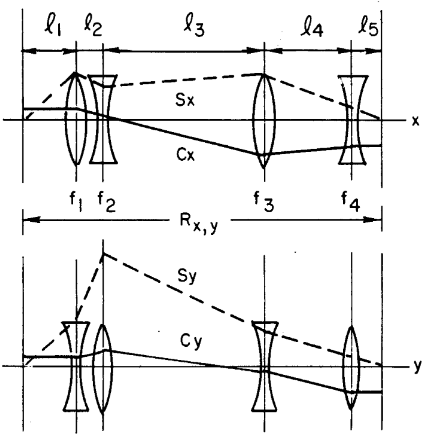

I genuinely struggled with trying to brute-force this system until getting some help during office hours. 
The hint was to assume the solution is a superposition between a telescope in the $x$-plane and one in the $y$-plane,
including the $f$ and $l$ relationships, all with thin-lens approximation.

$$
\begin{array}{c:c:c}
    l_1 + l_2 = f_2 
 &  l_3 + l_4 = f_2 + f_4 
 &  l_5 = f_4
\\  l_1 = f_1 
 &  l_2 + l_3 = f_1 + f_3
 &  l_4 + l_5 = f_3
\end{array}
$$

These are great linear equations, and sympy can find how many terms must be independent immediately.
<!-- We can work down some relations between $l$'s from these.

$$
\begin{array}
\\  l_1 + l_2 = f_2 
 &  l_3 + l_4 = f_2 + l_5
\\  l_2 + l_3 = l_1 + f_3
 &  l_4 + l_5 = f_3
\end{array}
$$
$$
\begin{array}
\\  l_3 = l_1 + l_2 + l_5 - l_4
\\  l_3 = l_1 + l_4 + l_5 - l_2
\end{array}
$$
Now for the transfer matricies -->

---

In [7]:
drift_lengths = symbols('l_(1:6)', real=True, positive=True)
l_1, l_2, l_3, l_4, l_5 = drift_lengths
f_3, f_4 = symbols('f_3 f_4', real=True, positive=True)

eqns = [
    l_1 + l_2 - f_2,
    l_3 + l_4 - f_2 - f_4,
    l_5 - f_4,
    l_1 - f_1,
    l_2 + l_3 - f_1 - f_3,
    l_4 + l_5 - f_3
]

relations = solve(eqns)
display(relations)

{f_1: l_3 - l_5,
 f_2: l_3 + l_4 - l_5,
 f_3: l_4 + l_5,
 f_4: l_5,
 l_1: l_3 - l_5,
 l_2: l_4}

From this point onward, I've struggled pretty hard to get a working, completely diagonal answer. Let's see what these equations do specifically in the x-plane

---

Now, we'll substitute these into our transfer matrix

In [8]:
from sympy.physics.quantum import TensorProduct

drift_lengths = symbols('l_(1:6)', real=True, positive=True)
f_3, f_4 = symbols('f_3 f_4', real=True, positive=True)
[TO1, TO2, TO3, TO4, TO5] = [TensorProduct(eye(2),Drift.subs(d,lsymbol)) for lsymbol in drift_lengths]

TF1 = Matrix([
    [F1, zeros(2,2)],
    [zeros(2,2), F1_y]
    ])
TD2 = TF1.replace(f_1, -f_2)
TF3 = TF1.replace(f_1,  f_3)
TD4 = TF1.replace(f_1, -f_4)
display(TO1, TD2)

Matrix([
[1, l_1, 0,   0],
[0,   1, 0,   0],
[0,   0, 1, l_1],
[0,   0, 0,   1]])

Matrix([
[    1, 0,      0, 0],
[1/f_2, 1,      0, 0],
[    0, 0,      1, 0],
[    0, 0, -1/f_2, 1]])

These elements track both $x$ and $y$ evolution simultaneously, now evolving the vector $\begin{pmatrix} x \\ x' \\ y \\ y' \end{pmatrix}$ instead.
From here, we can start applying our relations until we've boiled out most of the $f$ terms.



In [9]:
Telescope_2D = [TO5, TD4, TO4, TF3, TO3, TD2, TO2, TF1, TO1] # matrix order
Transfer_xy = simplify(MatMul(*Telescope_2D).doit()) # no step-by-step here

Transfer_xy = simplify(Transfer_xy.subs(relations))
display(Transfer_xy)

Matrix([
[(l_3**2*l_5 - 2*l_3*l_4*l_5 - 2*l_3*l_5**2 - 4*l_4**3 - 7*l_4**2*l_5 - 2*l_4*l_5**2 + l_5**3)/(l_3**2*l_4 + l_3**2*l_5 + l_3*l_4**2 - l_3*l_4*l_5 - 2*l_3*l_5**2 - l_4**2*l_5 + l_5**3), (l_3 - l_5)*(l_3*l_5 + 2*l_4*(l_4 + l_5) + l_5*(l_4 + l_5) + 2*(l_4 + l_5)*(l_3 + l_4 - l_5) - (2*l_4 + l_5)*(l_3 + l_4 - l_5))/((l_4 + l_5)*(l_3 + l_4 - l_5)),                                                                     0,                                                                                                                                                         0],
[                                                                                                             2*l_4*(-l_4 - l_5)/(l_5*(l_3**2 + l_3*l_4 - 2*l_3*l_5 - l_4*l_5 + l_5**2)),                                                                                                                 (l_3 - l_5)*(l_4 + l_5)/(l_5*(l_3 + l_4 - l_5)),                                                                     0,

In [10]:
# New system
new_system = [
    # Eq(Transfer_xy[0,0], -f_3/f_1).subs(relations),
    # Eq(Transfer_xy[2,2], -f_4/f_2).subs(relations),
    Eq(Transfer_xy[0,0], 1/Transfer_xy[1,1]),
    Eq(Transfer_xy[2,2], 1/Transfer_xy[3,3]),
]
solve(new_system)

[]

That's not quite perfect, but we can start boiling out terms from here by setting off-diagonal terms equal to zero. This will let us popa few more varaibles.

In [11]:
l4_sol = solve(Transfer_xy[0,1], l_4)[0]
Transfer_xy_constrained = simplify(Transfer_xy.subs(l_4, l4_sol))
#display(Transfer_xy_constrained)
l3_sol = solve(Transfer_xy_constrained[2,3], l_3)[0]
Transfer_xy_constrained.subs(l_3, l3_sol)

Matrix([
[                                         1, 0,               0, 0],
[2*I*(l_5**(3/2) - I*l_5**(3/2))/l_5**(5/2), 1,               0, 0],
[                                         0, 0,               1, 0],
[                                         0, 0, 2/l_5 + 2*I/l_5, 1]])

That's not quite right. We Our final result should have two free parameters on the diagonals

$$
\begin{pmatrix}
\\ - m_x & 0 & 0 & 0
\\ 0 & -{1 \over m_x} & 0 & 0 
\\ 0 & 0 & - m_y & 0
\\ 0 & 0 & 0 & -{1 \over m_y}
\end{pmatrix}
$$

Maybe, instead of parameterizing zeros into off-diagonals, we'll solve for these terms instead.

In [12]:
m_x, m_y = symbols('m_x m_y', real=True)

zero_matrix = Transfer_xy - diag(-m_x, -1/m_x, m_y, -1/m_y)
mx_sol = solve(zero_matrix[0,0], m_x)[0]
zero_matrix = simplify(zero_matrix.subs(m_x, mx_sol))
my_sol = solve(zero_matrix[2,2], m_y)[0]
zero_matrix = simplify(expand(zero_matrix.subs(m_y, my_sol)))
l4_sol = solve(zero_matrix[0,1], l_4)

# two solutions to l_4 appear, let's try both
zero_matrix_0 = simplify(expand(zero_matrix.subs(l_4, l4_sol[0])))
zero_matrix_1 = simplify(expand(zero_matrix.subs(l_4, l4_sol[1])))

display(zero_matrix_0)
display(zero_matrix_1)
final = solve(zero_matrix_1[2,3], l_3)
final

Matrix([
[                                                                                                                                                              0, 0,                                                                                                                    0,                                                                                                                                                                                                                                                 0],
[2*(l_3*sqrt(l_5) - l_5**(3/2) - l_5*sqrt(-l_3 + l_5))/(l_3**2*sqrt(l_5) - 3*l_3*l_5**(3/2) - l_3*l_5*sqrt(-l_3 + l_5) + 2*l_5**(5/2) + l_5**2*sqrt(-l_3 + l_5)), 0,                                                                                                                    0,                                                                                                                                                                                      

Matrix([
[                                                                                                                                                              0, 0,                                                                                                                    0,                                                                                                                                                                                                                                                 0],
[2*(l_3*sqrt(l_5) - l_5**(3/2) + l_5*sqrt(-l_3 + l_5))/(l_3**2*sqrt(l_5) - 3*l_3*l_5**(3/2) + l_3*l_5*sqrt(-l_3 + l_5) + 2*l_5**(5/2) - l_5**2*sqrt(-l_3 + l_5)), 0,                                                                                                                    0,                                                                                                                                                                                      

[2*l_5]

In [13]:
zero_matrix_1.subs(l_3, final[0].evalf())

Matrix([
[                                                    0, 0,                   0,   0],
[-2.0*I*(1.0*l_5**(3/2) + 1.0*I*l_5**(3/2))/l_5**(5/2), 0,                   0,   0],
[                                                    0, 0,                   0,   0],
[                                                    0, 0, 2.0/l_5 - 2.0*I/l_5, 2.0]])

Maybe I have too many constraints now?

In [14]:
eqns = [
    # l_1 + l_2 - f_2,
    # l_3 + l_4 - f_2 - f_4,
    l_5 - f_4,
    l_1 - f_1,
    # l_2 + l_3 - f_1 - f_3,
    # l_4 + l_5 - f_3
]

relations = solve(eqns)
display(relations)

Transfer_xy = simplify(MatMul(*Telescope_2D).doit()) # no step-by-step here
display(Transfer_xy)

{f_1: l_1, f_4: l_5}

Matrix([
[(f_1*f_2*f_3*f_4 + f_1*f_2*f_3*l_5 - f_1*f_2*(f_4*l_5 + l_4*(f_4 + l_5)) + f_1*(f_3*f_4*l_5 + f_3*l_4*(f_4 + l_5) + l_3*(f_3*f_4 + f_3*l_5 - f_4*l_5 - l_4*(f_4 + l_5))) - f_2*f_3*f_4*l_5 - f_2*f_3*l_4*(f_4 + l_5) - f_2*l_3*(f_3*f_4 + f_3*l_5 - f_4*l_5 - l_4*(f_4 + l_5)) - l_2*(f_2*f_3*f_4 + f_2*f_3*l_5 - f_2*(f_4*l_5 + l_4*(f_4 + l_5)) + f_3*f_4*l_5 + f_3*l_4*(f_4 + l_5) + l_3*(f_3*f_4 + f_3*l_5 - f_4*l_5 - l_4*(f_4 + l_5))))/(f_1*f_2*f_3*f_4), (f_1*f_2*f_3*f_4*l_5 + f_1*f_2*f_3*l_4*(f_4 + l_5) + f_1*f_2*l_3*(f_3*f_4 + f_3*l_5 - f_4*l_5 - l_4*(f_4 + l_5)) + f_1*l_2*(f_2*f_3*f_4 + f_2*f_3*l_5 - f_2*(f_4*l_5 + l_4*(f_4 + l_5)) + f_3*f_4*l_5 + f_3*l_4*(f_4 + l_5) + l_3*(f_3*f_4 + f_3*l_5 - f_4*l_5 - l_4*(f_4 + l_5))) + l_1*(f_1*f_2*f_3*f_4 + f_1*f_2*f_3*l_5 - f_1*f_2*(f_4*l_5 + l_4*(f_4 + l_5)) + f_1*(f_3*f_4*l_5 + f_3*l_4*(f_4 + l_5) + l_3*(f_3*f_4 + f_3*l_5 - f_4*l_5 - l_4*(f_4 + l_5))) - f_2*f_3*f_4*l_5 - f_2*f_3*l_4*(f_4 + l_5) - f_2*l_3*(f_3*f_4 + f_3*l_5 - f_4*l_5 - l_4*(f

## 2. Quarter-Wave

We can do this pretty easily with sympy again. We already know a lot about our transfer matrix from the general equation

$$
M = \begin{pmatrix}
    \sqrt{\beta_2 \over \beta_1} \left(\cos \mu + \alpha_1 \sin \mu \right)
&   \sqrt{\beta_1 \beta_2} \sin \mu
\\  -{1 + \alpha_1\alpha_2 \over \sqrt{\beta_1 \beta_2}} \sin \mu 
    - {\alpha_2 - \alpha_1 \over \sqrt{\beta_1 \beta_2}} \cos \mu
&   \sqrt{\beta_2 \over \beta_1} \left( \cos \mu - \alpha_2 \sin \mu \right)
\end{pmatrix}
$$

For $\mu = {\pi \over 2}$ this gives

$$
M = \begin{pmatrix}
    \sqrt{\beta_2 \over \beta_1} \alpha_1 
&   \sqrt{\beta_1 \beta_2} 
\\  -{1 + \alpha_1\alpha_2 \over \sqrt{\beta_1 \beta_2}} 
&   -\alpha_2 \sqrt{\beta_2 \over \beta_1}
\end{pmatrix}
$$

Following our discussion in class, we're going to use $f = {l \over \sqrt{2}}$ to support our quarter-wave requirement

In [15]:
l, q1, q2 = symbols('l Q1 Q2', real=True, positive=True)
beta_1, beta_2 = symbols('beta_1, beta_2', real=True, positive=True)
gamma_1, gamma_2, alpha_1, alpha_2 = symbols('gamma_1 gamma_2 alpha_1 alpha_2', real=True)

Quarter_Wave = Matrix([
    [sqrt(beta_2/beta_1)*alpha_1, sqrt(beta_1*beta_2)],
    [-(1+alpha_1*alpha_2)/sqrt(beta_1*beta_2), - alpha_2 * sqrt(beta_1/beta_2)]
])

L12 = Drift.replace(d, l/2)
L = Drift.replace(d,l)
F = Focusing.subs(f, l/sqrt(2))
D = Defocusing.subs(f, l/sqrt(2))
Q1 = Defocusing.subs(f, q1)
Q2 = Focusing.subs(f, q2)

# should we keep f = l/sqrt(2)? Yep, garuntees µ=π/2
Elements = [Q2,L12,D,L,F,L12,Q1] 

Beam_Line = step_by_step_mul(Elements)

#display(Quarter_Wave)
display(Eq(Quarter_Wave, Beam_Line))

Matrix([
[    1, 0],
[-1/Q2, 1]])*Matrix([
[1, l/2],
[0,   1]])*Matrix([
[        1, 0],
[sqrt(2)/l, 1]])*Matrix([
[1, l],
[0, 1]])*Matrix([
[         1, 0],
[-sqrt(2)/l, 1]])*Matrix([
[1, l/2],
[0,   1]])*Matrix([
[   1, 0],
[1/Q1, 1]])

Matrix([
[    1, 0],
[-1/Q2, 1]])*Matrix([
[1, l/2],
[0,   1]])*Matrix([
[        1, 0],
[sqrt(2)/l, 1]])*Matrix([
[1, l],
[0, 1]])*Matrix([
[         1, 0],
[-sqrt(2)/l, 1]])*Matrix([
[(Q1 + l/2)/Q1, l/2],
[         1/Q1,   1]])

Matrix([
[    1, 0],
[-1/Q2, 1]])*Matrix([
[1, l/2],
[0,   1]])*Matrix([
[        1, 0],
[sqrt(2)/l, 1]])*Matrix([
[1, l],
[0, 1]])*Matrix([
[                      (Q1 + l/2)/Q1,           l/2],
[(2*l - sqrt(2)*(2*Q1 + l))/(2*Q1*l), 1 - sqrt(2)/2]])

Matrix([
[    1, 0],
[-1/Q2, 1]])*Matrix([
[1, l/2],
[0,   1]])*Matrix([
[        1, 0],
[sqrt(2)/l, 1]])*Matrix([
[(2*Q1 + 3*l - sqrt(2)*(2*Q1 + l))/(2*Q1), l*(3 - sqrt(2))/2],
[     (2*l - sqrt(2)*(2*Q1 + l))/(2*Q1*l),     1 - sqrt(2)/2]])

Matrix([
[    1, 0],
[-1/Q2, 1]])*Matrix([
[1, l/2],
[0,   1]])*Matrix([
[(2*Q1 + 3*l - sqrt(2)*(2*Q1 + l))/(2*Q1), l*(3 - sqrt(2))/2],
[                       -2/l + sqrt(2)/Q1,           sqrt(2)]])

Matrix([
[    1, 0],
[-1/Q2, 1]])*Matrix([
[-sqrt(2) + 3*l/(2*Q1),   3*l/2],
[    -2/l + sqrt(2)/Q1, sqrt(2)]])

Matrix([
[                         -sqrt(2) + 3*l/(2*Q1),                3*l/2],
[-2/l + sqrt(2)/Q2 + sqrt(2)/Q1 - 3*l/(2*Q1*Q2), sqrt(2) - 3*l/(2*Q2)]])

Eq(Matrix([
[                 alpha_1*sqrt(beta_2)/sqrt(beta_1),          sqrt(beta_1)*sqrt(beta_2)],
[(-alpha_1*alpha_2 - 1)/(sqrt(beta_1)*sqrt(beta_2)), -alpha_2*sqrt(beta_1)/sqrt(beta_2)]]), Matrix([
[                         -sqrt(2) + 3*l/(2*Q1),                3*l/2],
[-2/l + sqrt(2)/Q2 + sqrt(2)/Q1 - 3*l/(2*Q1*Q2), sqrt(2) - 3*l/(2*Q2)]]))

This matrix isn't super simple, but the top-right term is useful

$$
\begin{array}{c}
  {3 l \over 2} = \sqrt{\beta_1 \beta_2}
\\l = {2 \over 3} \sqrt{\beta_1 \beta_2}
\end{array}
$$

Let's start working through things with sympy

In [16]:
QW_Beam_Line = Beam_Line.subs(l, Rational(2,3)*sqrt(beta_1*beta_2))
q1_sol = solve(Eq(Quarter_Wave[0,0], QW_Beam_Line[0,0]), q1)[0]
display(Eq(q1, q1_sol))

q2_sol = solve(Eq(Quarter_Wave[1,1], QW_Beam_Line[1,1]), q2)[0]
display(Eq(q2, q2_sol))

Eq(Q1, beta_1*sqrt(beta_2)/(alpha_1*sqrt(beta_2) + sqrt(2)*sqrt(beta_1)))

Eq(Q2, sqrt(beta_1)*beta_2/(alpha_2*sqrt(beta_1) + sqrt(2)*sqrt(beta_2)))

Easy peasy! By construction this should turn our beamline to turn into the general quarter-wave matrix

In [17]:
QW_complete = QW_Beam_Line.subs({q1: q1_sol, q2: q2_sol}).expand()
display(QW_complete)

K1 = Matrix([
    [beta_1, -alpha_1],
    [-alpha_1, (1+alpha_1*alpha_1)/beta_1]
])

display(simplify(QW_complete*K1*QW_complete.T))

Matrix([
[                                           alpha_1*sqrt(beta_2)/sqrt(beta_1),          sqrt(beta_1)*sqrt(beta_2)],
[-alpha_1*alpha_2/(sqrt(beta_1)*sqrt(beta_2)) - 1/(sqrt(beta_1)*sqrt(beta_2)), -alpha_2*sqrt(beta_1)/sqrt(beta_2)]])

Matrix([
[  beta_2,                -alpha_2],
[-alpha_2, (alpha_2**2 + 1)/beta_2]])

That confirms our transfer matricies work independent of $\alpha$ and $\beta$ choice. We can encode our $l$ and $Q_1/Q_2$ based on our target twiss parameters. We also have

$$
f = { \sqrt{2} \over 3} {\sqrt{\beta_1 \beta_2}}
$$

---

For plotting, we could go one-by-one and find the twiss parameters after each element, but I think this is a great time to try out PyTao. Pytao is just a wrapper of Tao, but it's great for making really simple plots like alpha/beta plots inside of a jupyter notebook. I'm running this notebook within my WSL since it requires a Tao installation.

In [18]:
params = {
    beta_1: 5,
    beta_2: 50,
    alpha_1: 1,
    alpha_2: 1,
}

def fill_in_params(params):
    params[l] = Rational(2,3)*sqrt(params[beta_1]*params[beta_2])
    params[f] = params[l]/sqrt(2)
    params[q1] = q1_sol.subs(params)
    params[q2] = q2_sol.subs(params)

fill_in_params(params)

K1_symb, K2_symb, M_symb = [MatrixSymbol(k, 2, 2) for k in ('K1', 'K2', 'M')]

display(Eq(M_symb, Beam_Line.subs(params).evalf()))
display(Eq(K1_symb,K1.subs(params).evalf()))
display(Eq(K2_symb, (Beam_Line.subs(params)*K1.subs(params)*Beam_Line.subs(params).T).evalf()))
params

Eq(M, Matrix([
[  3.16227766016838,   15.8113883008419],
[-0.126491106406735, -0.316227766016838]]))

Eq(K1, Matrix([
[ 5.0, -1.0],
[-1.0,  0.4]]))

Eq(K2, Matrix([
[50.0, -1.0],
[-1.0, 0.04]]))

{beta_1: 5,
 beta_2: 50,
 alpha_1: 1,
 alpha_2: 1,
 l: 10*sqrt(10)/3,
 f: 10*sqrt(5)/3,
 Q1: 25*sqrt(2)/(sqrt(10) + 5*sqrt(2)),
 Q2: 50*sqrt(5)/(sqrt(5) + 10)}

In [19]:
# conda install -c conda-forge pytao

Lets create a init file and lattice before starting up Tao.

In [20]:
def make_lattice(params):
    k_Q1 = float(params[q1].evalf())
    k_Q2 = float(params[q2].evalf())
    k_f  = float(params[f].evalf())
    
    lat_text = f"""\
! lattice setup
beginning[alpha_a] = { params[alpha_1]}.   ! m  a-mode alpha function
beginning[alpha_b] = {-params[alpha_1]}.   ! m  b-mode = -a-mode

beginning[beta_a] = {params[beta_1]}.     ! m  a-mode beta  function
beginning[beta_b] = {params[beta_1]}.     ! m  b-mode = a-mode

beginning[e_tot] = 10e6   ! eV shouldn't matter for magnets

parameter[geometry] = open

L:  drift, L = {float(params[l].evalf())}
L2: drift, L = {float(params[l].evalf())/2}
Q1: multipole, L = 0.0, k1l = {-1/k_Q1}
Q2: multipole, L = 0.0, k1l = { 1/k_Q2}
F:  multipole, L = 0.0, k1l = { 1/k_f}
D:  multipole, L = 0.0, k1l = {-1/k_f}

lat: line = (Q1, L2, F, L, D, L2, Q2)     ! Start to finish
use, lat                    

"""

    with open('QuarterWave.bmad', 'w') as fi:
        fi.write(lat_text)

def make_init():
    init_text = f"""\
&tao_design_lattice
  n_universes = 1
  design_lattice(1)%file = "QuarterWave.bmad"
/

&tao_plot_page
  plot_page%size = 500, 500
  place(1) = 'r12', 'alpha'
  place(2) = 'r22', 'beta'
/
"""
    with open('tao.init', 'w') as fi:
        fi.write(init_text)

make_lattice(params)
make_init()

Now we can make our plots using the paramaters we found through sympy

In [2]:
from pytao import Tao
import matplotlib.pyplot as plt
from pathlib import Path 

In [22]:
init_file = Path.cwd() / "tao.init" # make sure Path.cwd() is this directory
tao = Tao(init_file=init_file, plot="mpl")
tao.show('lat')

['# Values shown are for the Downstream End of each Element (Girder elements shown at ref point):',
 '# Index  name      key                       s       l    beta   phi_a    eta   orbit    beta   phi_b    eta   orbit  Track',
 '#                                                            a   [2pi]      x  x [mm]       b   [2pi]      y  y [mm]  State',
 '      0  BEGINNING Beginning_Ele         0.000     ---    5.00   0.000   0.00   0.000    5.00   0.000   0.00   0.000  Alive',
 '      1  Q1        Multipole             0.000   0.000    5.00   0.000   0.00   0.000    5.00   0.000   0.00   0.000  Alive',
 '      2  L2        Drift                 5.270   5.270   16.38   0.099   0.00   0.000    6.95   0.176   0.00   0.000  Alive',
 '      3  F         Multipole             5.270   0.000   16.38   0.099   0.00   0.000    6.95   0.176   0.00   0.000  Alive',
 '      4  L         Drift                15.811  10.541   14.53   0.219   0.00   0.000  108.81   0.239   0.00   0.000  Alive',
 '  

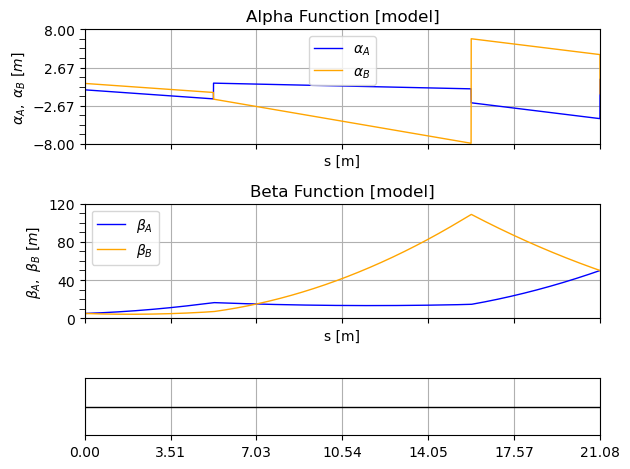

In [23]:
tao.plot(["alpha", "beta"])

We did it! Using `multipole` was key since it is bmad's built in thin lens, hence the lack of any elements on the layout

In addition, we can see the transfer matrix is the same as our design

In [24]:
tao.cmds(["show mat"])

[['From: BEGINNING',
  'To:   END',
  'Symplectic Error:  6.66E-16',
  '',
  '     3.16227766    15.81138830     0.00000000     0.00000000     0.00000000     0.00000000   :  0.00000000E+00',
  '    -0.12649111    -0.31622777     0.00000000     0.00000000     0.00000000     0.00000000   :  0.00000000E+00',
  '     0.00000000     0.00000000    -3.16227766    15.81138830     0.00000000     0.00000000   :  0.00000000E+00',
  '     0.00000000     0.00000000    -0.12649111     0.31622777     0.00000000     0.00000000   :  0.00000000E+00',
  '     0.00000000     0.00000000     0.00000000     0.00000000     1.00000000     0.05504891   :  0.00000000E+00',
  '     0.00000000     0.00000000     0.00000000     0.00000000     0.00000000     1.00000000   :  0.00000000E+00']]

In [25]:
Beam_Line.subs(params).evalf()

Matrix([
[  3.16227766016838,   15.8113883008419],
[-0.126491106406735, -0.316227766016838]])

## 3. Dispersion Supression

As per usual, we'll start with the linear algebra. A dipole has the transfer matrix

$$
M = \begin{pmatrix}
\cos\left(l \over \rho \right) &
\rho \sin \left(l \over \rho \right) \\
- {1 \over \rho} \sin \left( l \over \rho \right) &
\cos\left(l \over \rho \right)
\end{pmatrix}
$$

Which, in addition contribute the particular component


$$
\begin{gathered}
D(s) = \rho \left( 1 - \cos \left( l \over \rho \right) \right) \\
D'(s) = \sin \left( l \over \rho \right)
\end{gathered}
$$

In lecture 6 we derived that a closed system must have $\eta(s+C) = \eta$, and found a simple equation for dispersion

$$
\begin{gathered}
\eta = \frac{(1-S')D+SD'}{2(1-\cos(\mu))} \\
\eta' = \frac{(1-C)D'+C'D}{2(1-\cos(\mu))}
\end{gathered}
$$

What does the $\pi \over 2$ dispersion suppression segment from lecture 8 have for this?
<!-- $$
\begin{gathered}
\begin{pmatrix}
\eta \\ \eta' \\ 1
\end{pmatrix}
=
\begin{pmatrix}
C & S & D \\
C' & S' & D' \\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
\eta \\ \eta' \\ 1
\end{pmatrix}
\end{gathered}
$$ -->



In [25]:
import os

if os.getcwd().split('/')[-1] == 'project_2':
    os.chdir(Path.cwd() / "dispersion_suppression_tune")

init_file = "tao.init" 
lattice_file = "dispersion_suppression_tune.bmad"
tao = Tao(init_file=init_file, lattice_file=lattice_file, plot="mpl")
tao.show('lat')

['# Values shown are for the Downstream End of each Element (Girder elements shown at ref point):',
 '# Index  name      key                       s       l    beta   phi_a    eta   orbit    beta   phi_b    eta   orbit  Track',
 '#                                                            a   [2pi]      x  x [mm]       b   [2pi]      y  y [mm]  State',
 '      0  BEGINNING Beginning_Ele         0.000     ---   33.76   0.000   5.58   0.000   12.32   0.000   0.00   0.000  Alive',
 '      1  QF_DS     Quadrupole            0.500   0.500   32.93   0.002   5.51   0.000   12.65   0.006   0.00   0.000  Alive',
 '      2  D         Drift                 1.000   0.500   31.32   0.005   5.37   0.000   13.35   0.013   0.00   0.000  Alive',
 '      3  DIPOLE_DS SBend                 9.000   8.000   12.88   0.070   3.57   0.000   32.26   0.076   0.00   0.000  Alive',
 '      4  D         Drift                 9.500   0.500   12.21   0.076   3.48   0.000   33.93   0.078   0.00   0.000  Alive',
 '  

In [26]:
tao.show('mat')

['From: BEGINNING',
 'To:   END',
 'Symplectic Error:  1.78E-15',
 '',
 '     0.50480796    29.14545160     0.00000000     0.00000000     0.00000000     2.76491185   :  0.00000000E+00',
 '    -0.02556725     0.50480796     0.00000000     0.00000000     0.00000000     0.14275508   :  0.00000000E+00',
 '     0.00000000     0.00000000     0.53338123    10.42210899     0.00000000     0.00000000   :  0.00000000E+00',
 '     0.00000000     0.00000000    -0.06865256     0.53338123     0.00000000     0.00000000   :  0.00000000E+00',
 '    -0.14275508    -2.76491185     0.00000000     0.00000000     1.00000000    -0.01624296   :  0.00000000E+00',
 '     0.00000000     0.00000000     0.00000000     0.00000000     0.00000000     1.00000000   :  0.00000000E+00']